## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.10,101.00,157,93.20,38.00,4.00,4.86,87,151
1,48,1,21.60,87.00,183,103.20,70.00,3.00,3.89,69,75
2,72,2,30.50,93.00,156,93.60,41.00,4.00,4.67,85,141
3,24,1,25.30,84.00,198,131.40,40.00,5.00,4.89,89,206
4,50,1,23.00,101.00,192,125.40,52.00,4.00,4.29,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [15]:
pd.options.display.float_format = '{:.2f}'.format
df.agg({'AGE':['mean','var'],'BMI':['mean','var'],'BP':['mean','var'],'S1':['mean','var'],'S2':['mean','var'],'S3':['mean','var']
        ,'S4':['mean','var'],'S5':['mean','var'],'S6':['mean','var']})

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6
mean,48.52,26.38,94.65,189.14,115.44,49.79,4.07,4.64,91.26
var,171.85,19.52,191.30,1197.72,924.96,167.29,1.67,0.27,132.17


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

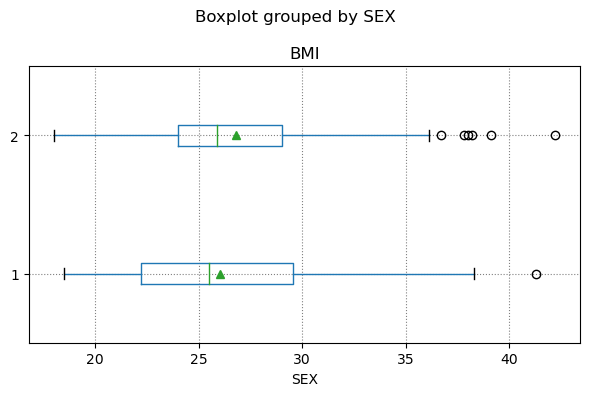

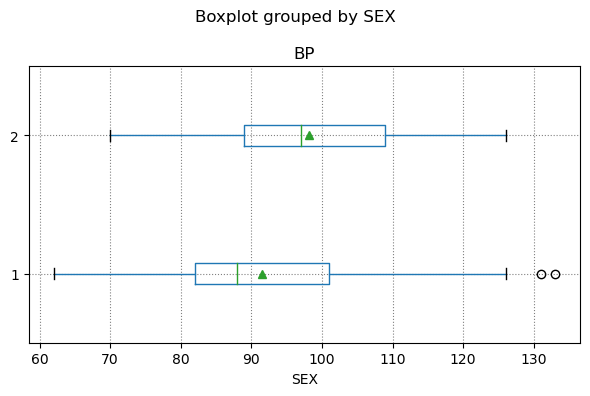

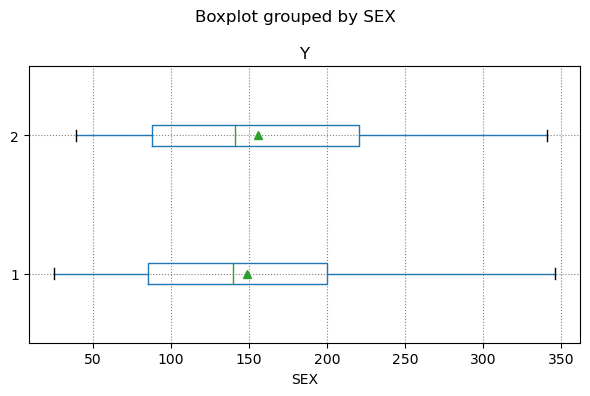

In [23]:
for column in ['BMI','BP','Y']:
    df.boxplot(column,vert=False,showmeans=True,by='SEX',figsize=(6,4))
    plt.grid(color='gray',linestyle='dotted')
    plt.tight_layout()
    plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

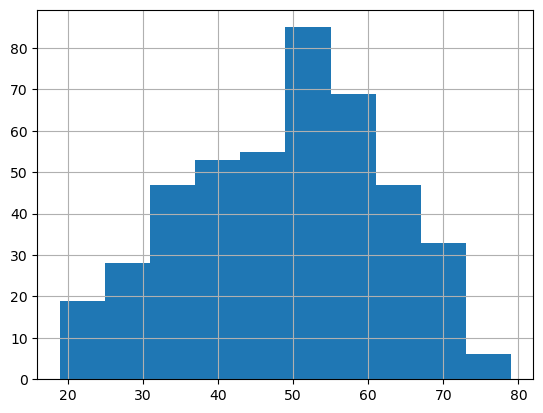

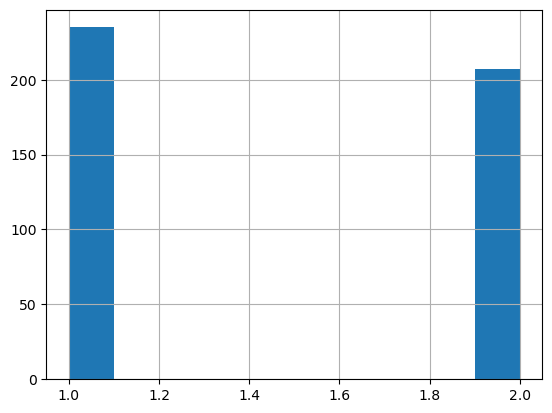

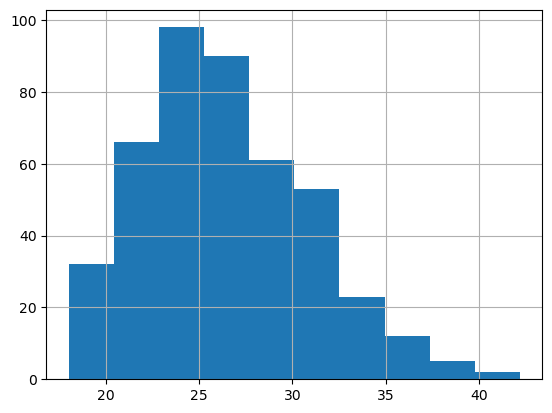

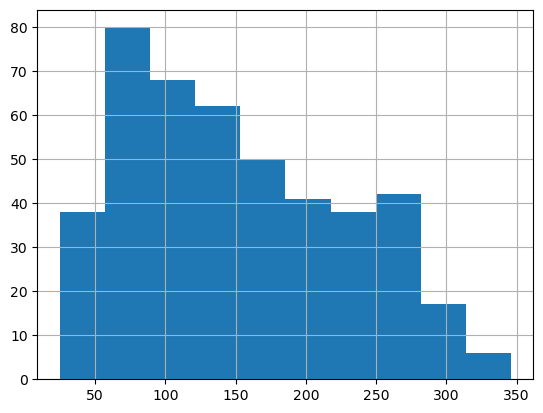

In [24]:
for column in ['AGE','SEX','BMI','Y']:
    df[column].hist()
    plt.show()

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [27]:
print(df.corr())

      AGE   SEX   BMI    BP   S1    S2    S3    S4    S5    S6     Y
AGE  1.00  0.17  0.19  0.34 0.26  0.22 -0.08  0.20  0.27  0.30  0.19
SEX  0.17  1.00  0.09  0.24 0.04  0.14 -0.38  0.33  0.15  0.21  0.04
BMI  0.19  0.09  1.00  0.40 0.25  0.26 -0.37  0.41  0.45  0.39  0.59
BP   0.34  0.24  0.40  1.00 0.24  0.19 -0.18  0.26  0.39  0.39  0.44
S1   0.26  0.04  0.25  0.24 1.00  0.90  0.05  0.54  0.52  0.33  0.21
S2   0.22  0.14  0.26  0.19 0.90  1.00 -0.20  0.66  0.32  0.29  0.17
S3  -0.08 -0.38 -0.37 -0.18 0.05 -0.20  1.00 -0.74 -0.40 -0.27 -0.39
S4   0.20  0.33  0.41  0.26 0.54  0.66 -0.74  1.00  0.62  0.42  0.43
S5   0.27  0.15  0.45  0.39 0.52  0.32 -0.40  0.62  1.00  0.46  0.57
S6   0.30  0.21  0.39  0.39 0.33  0.29 -0.27  0.42  0.46  1.00  0.38
Y    0.19  0.04  0.59  0.44 0.21  0.17 -0.39  0.43  0.57  0.38  1.00


### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [31]:
tval,pval=scipy.stats.ttest_ind(df.loc[df['SEX']==1,['Y']],df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f't-value = {tval[0]:.2f}\np-value = {pval[0]:.2f}')

t-value = -0.90
p-value = 0.37
